##  Description du probleme

### -  Le dataset est celui que nous avons eu à utiliser dans le TP n°2 

* classification des apprenants en deux classes Admin / echec   : Classification 

*  prediction du score des apprenants  Regression

In [213]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.errors import ParserError

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

import seaborn as sn
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics


from TP_2_CLASS import DataProcessing

csv_file_name = "scorm_tracking_copy.csv"

# Preview

In [169]:
data = DataProcessing(chemin_fichier_csv=csv_file_name)  # une classe creer dans le TP2

#data est un objet de la class DataProcessing qui contient les methode previsualiser les donnees

-   recuperation du dataset

In [170]:
dataset = data.getDataset()   # return le dataset / la base de donnee

In [222]:
# dataset

In [221]:
# dataset.isnull().sum()

*  la colonne object_id n'est pas utilisees dans l'entrainenemt il peut avoir des valeurs null.

In [220]:
# data.getListeColonne()

In [219]:
# data.getStat()

In [218]:
# data.getModuleActorStat("671-presentation")

*  quelques graphiques

In [217]:
# data.courbeTempsFScoreMax(data.nTopModule(10))

In [216]:
# data.nuagePoint(nom_colonne=['object_id'],agg_dic={'temps':'sum'},x_colonne='taux_de_reussite')

In [214]:
# data.camenbert()

In [215]:
# data.diagrammeEnBaton(data.nTopModule(10),horizontal=True)

* quelques correllations

In [223]:
# plt.matshow(data.getDataset().corr())
# plt.show()

# corr = data.getDataset().corr()
# sn.heatmap(corr, cmap="Blues",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values).set(title='Correlation entre toutes les colonnes');

# data.getDataset()

In [224]:
corr = data.getStat().corr()
# sn.heatmap(corr, cmap="Blues",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values);

# data.getDataset()
# corr
# data.getStat()

In [225]:
# on supprime  score_minimal

# corr = data.getStat().drop("score_minimal", axis='columns').corr()
# sn.heatmap(corr, cmap="Blues",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values);

# data.getStat()
# corr

In [183]:
# 671-presentation   340 apprenants (c'est le max)

In [226]:
# corr = data.getModuleActorStat("671-presentation").corr()
# sn.heatmap(corr, cmap="Blues",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values);

# data.getModuleActorStat("671-presentation")

In [185]:
# data.regrouperSelon(col_list=['object_id','actor'],agg_dic={'score':'max','temps':'sum'})

### Pretraitement

In [227]:
dataset = data.regrouperSelon(col_list=['object_id','actor'],agg_dic={'temps':'sum','score':'max','progression':'mean','session_uuid':'count','total_ecrans':'sum'})

dataset = dataset.reset_index() 

encoder = OneHotEncoder()


In [186]:


dataset_pour_regression = dataset.drop(['object_id', 'actor'], axis=1)
dataset_pour_classification = dataset.drop(['object_id', 'actor'], axis=1)


dataset_pour_classification['score'] = dataset_pour_classification['score'].map(lambda score : 1 if score >= 50 else 0)
# dataset_pour_classification
# dataset



#Mettre a l'echel pour la 

t_max = dataset_pour_regression.temps.max()
score_max = dataset_pour_regression.score.max()
session_uuid_max = dataset_pour_regression.session_uuid.max()
total_ecrans_max = dataset_pour_regression.total_ecrans.max()


dataset_pour_regression['temps'] = dataset_pour_regression['temps'].map(lambda temps : temps/t_max)
dataset_pour_regression['score'] = dataset_pour_regression['score'].map(lambda score : score/score_max)
dataset_pour_regression['session_uuid'] = dataset_pour_regression['session_uuid'].map(lambda session_uuid : session_uuid/session_uuid_max)
dataset_pour_regression['total_ecrans'] = dataset_pour_regression['total_ecrans'].map(lambda total_ecrans : total_ecrans/total_ecrans_max)



In [187]:
dataset_pour_regression

,temps,score,progression,session_uuid,total_ecrans
0,0.000000,0.00,0.330000,0.010989,0.002322
1,0.000040,0.00,0.070000,0.010989,0.010836
2,1.000000,0.22,0.989011,1.000000,0.493034
3,0.003137,1.00,1.000000,0.032967,0.016254
4,0.011050,1.00,0.856667,0.065934,0.032508
...,...,...,...,...,...
15408,0.018108,0.02,0.753333,0.032967,0.037152
15409,0.007153,0.42,0.502500,0.043956,0.049536
15410,0.010020,0.29,0.606364,0.362637,0.408669
15411,0.006899,0.85,1.000000,0.010989,0.012384


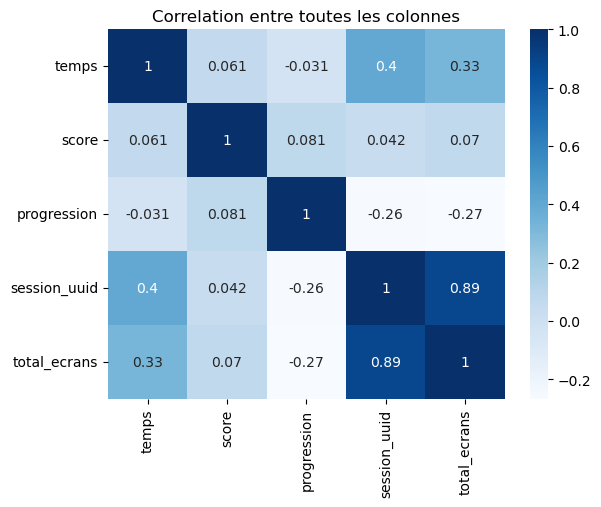

In [188]:

corr = dataset.corr()
sn.heatmap(corr, cmap="Blues",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set(title='Correlation entre toutes les colonnes');


# fonctions

In [189]:
# return alpha qui maximise la precision
def getAlphaPourPrecision(X_train, X_test, y_train, y_test,model_,afficher_graph=True):

    train_precision = list()
    test_precision = list()
    for i in alphas :
        model_.set_params(alpha=i)
        model_.fit(X_train, y_train)
        train_precision.append(model_.score(X_train, y_train))
        test_precision.append(model_.score(X_test, y_test))
    # train_precision, test_precision


    indice_alpha_optimal = np.argmax(train_precision)
    alpha_optimal = alphas[indice_alpha_optimal]


    if afficher_graph :
        
        fig, ax = plt.subplots(figsize=(15, 5))

        ax.plot(alphas, train_precision, label="precision d'entrainement")
        ax.plot(alphas, test_precision, label="precision de Test")

        ax.legend();
    return alpha_optimal

    # np.argmax(test_precision)
    # test_precision,alphas

In [190]:
# return alpha qui minimise l'erreur (log_loss pour la classification et mean_squared_error pour la regression)
def getAplhaPourErreur(X_train, X_test, y_train, y_test,model_,afficher_graph=True,regression=False):
    
    train_erreur = list()
    test_erreur = list()
    
    for i in alphas :
        model_.set_params(alpha=i)
        model_.fit(X_train, y_train)

        if not regression :
            
            train_prediction = model_.predict(X_train)
            train_erreur.append(metrics.log_loss(y_train,train_prediction))


            test_prediction = model_.predict(X_test)
            test_erreur.append(metrics.log_loss(y_test,test_prediction))
        else :
            train_prediction = model_.predict(X_train)
            train_erreur.append(metrics.mean_squared_error(y_train,train_prediction))


            test_prediction = model_.predict(X_test)
            test_erreur.append(metrics.mean_squared_error(y_test,test_prediction))
            
        


    # train_precision, test_precision

    # # alphas
    index_alpha_optimal_2 = np.argmin(train_erreur)
    alpha_optimale_2 = alphas[index_alpha_optimal_2]
    alpha_optimale_2
    if afficher_graph:
        fig, ax = plt.subplots(figsize=(15, 5))
        ax.plot(alphas, train_erreur, label="erreur d'entrainement")
        ax.plot(alphas, test_erreur, label="erreur de Test")

        ax.legend();
    
    return alpha_optimale_2

In [191]:
alphas = np.logspace(-5, 1, 60)
# alphas

# Classification

In [192]:
#Instaenciation
model_cl = SGDClassifier(verbose=False,
                      learning_rate="optimal", 
                      random_state=1
                     )

In [193]:
# Separation des donnees
Y_cl = dataset_pour_classification['score']
X_cl = dataset_pour_classification.drop('score',axis=1)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, Y_cl, random_state=2, train_size = .80)

*  recherche de Alpha : parametre utiliser pour la regularisation et aussi utiliser dans le calcule de l'hyper parametre (learning rate)

8.227241341700473e-05

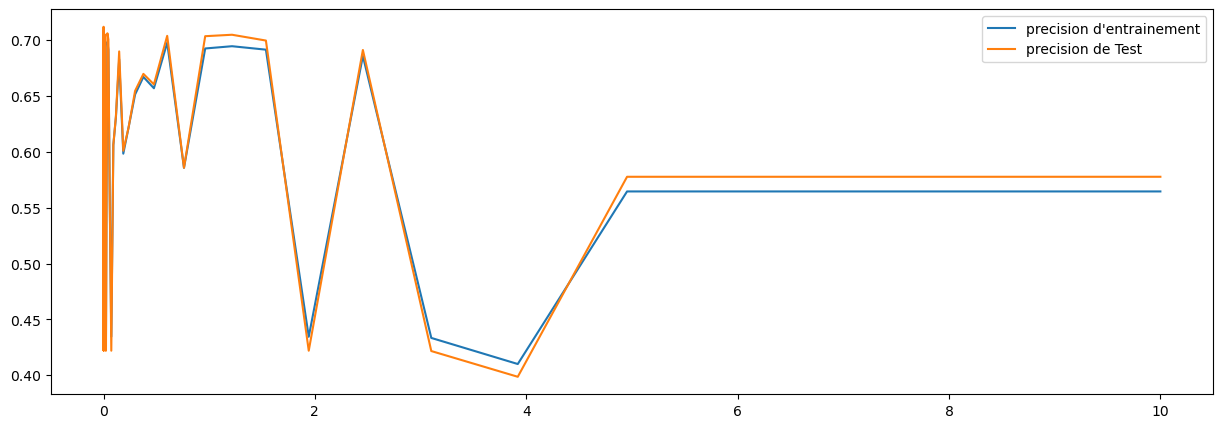

In [194]:
alpha_cl_PRECISION = getAlphaPourPrecision(X_train=X_train_cl, 
                                   X_test=X_test_cl, 
                                   y_train=y_train_cl, 
                                   y_test=y_test_cl,
                                   model_=model_cl,
                                          afficher_graph=True)
alpha_cl_PRECISION   # Alpha qui donne la precision maximale

8.227241341700473e-05

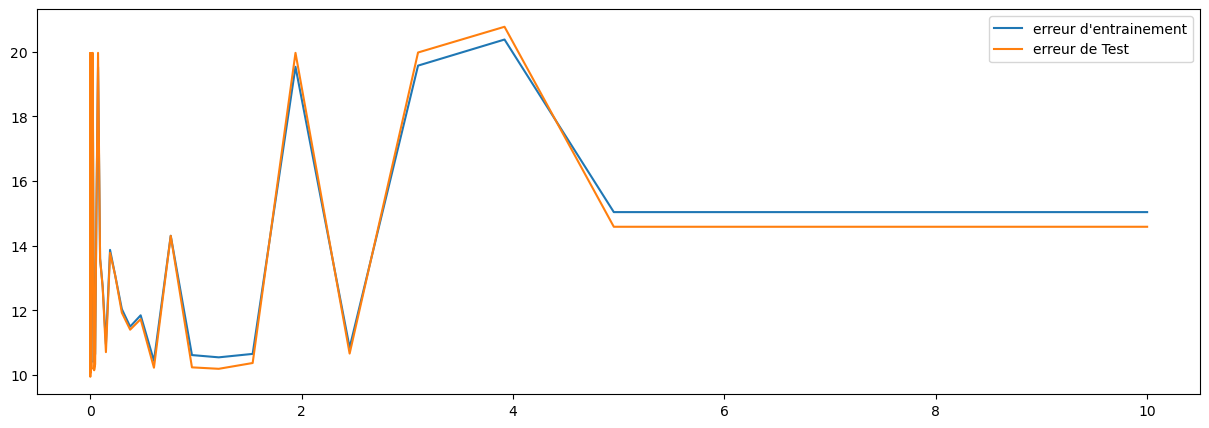

In [195]:
alpha_cl_ERREUR = getAplhaPourErreur(X_train=X_train_cl, 
                                     X_test =X_test_cl, 
                                     y_train=y_train_cl, 
                                     y_test=y_test_cl,
                                     model_=model_cl,
                                     afficher_graph=True)
alpha_cl_ERREUR   # Alpha qui donne l'erreur minimle

### Model pour la classification


In [196]:
alpha_cl_PRECISION == alpha_cl_ERREUR

True

In [197]:
model_cl.set_params(alpha=alpha_cl_ERREUR)

model_cl.fit(X_train_cl,y_train_cl)

cl_score = model_cl.score(X_train_cl,y_train_cl)

#metrics pour les train
tmp_train_predict = model_cl.predict(X_train_cl)
cl_accuracy = metrics.accuracy_score(y_train_cl,tmp_train_predict)
cl_log_loss = metrics.log_loss(y_train_cl,tmp_train_predict)
cl_confusion_matrix = metrics.confusion_matrix(y_train_cl,tmp_train_predict) #Calculer la matrice de confusion pour évaluer la précision d'un classifieur.

cl_hinge_loss = metrics.hinge_loss(y_train_cl,tmp_train_predict) #Renvoie la perte de charnière moyenne.
cl_hamming_loss = metrics.hamming_loss(y_train_cl,tmp_train_predict) #Renvoie la perte de Hamming moyenne

cl_f1_score = metrics.f1_score(y_train_cl,tmp_train_predict) #Calcul le score F1 (moyenne harmonique de la précision et du rappel)
cl_recall_score = metrics.recall_score(y_train_cl,tmp_train_predict)




#

# metrics pour les test
cl_score_test = model_cl.score(X_test_cl,y_test_cl)
tmp_test_predict = model_cl.predict(X_test_cl)
cl_accuracy_test = metrics.accuracy_score(y_test_cl,tmp_test_predict)
cl_log_loss_test = metrics.log_loss(y_test_cl,tmp_test_predict)
cl_hinge_loss_test = metrics.hinge_loss(y_test_cl,tmp_test_predict) #Renvoie la perte de charnière moyenne.
cl_hamming_loss_test = metrics.hamming_loss(y_test_cl,tmp_test_predict) #Renvoie la perte de Hamming moyenne

cl_confusion_matrix_test = metrics.confusion_matrix(y_test_cl,tmp_test_predict) #Calculer la matrice de confusion pour évaluer la précision d'un classifieur.


cl_f1_score_test = metrics.f1_score(y_test_cl,tmp_test_predict) #Calcul le score F1 (moyenne harmonique de la précision et du rappel)
cl_recall_score_test = metrics.recall_score(y_test_cl,tmp_test_predict)
#



label  = ['score', 'accuracy_score', 'log_loss',  'hinge_loss',  'hamming_loss'  , 'f1_score' , 'recall_score']
valeur_train = [cl_score,  cl_accuracy,    cl_log_loss,  cl_hinge_loss , cl_hamming_loss,  cl_f1_score , cl_recall_score]
valeur_test = [cl_score_test,  cl_accuracy_test,    cl_log_loss_test,  cl_hinge_loss_test , cl_hamming_loss_test,  cl_f1_score_test , cl_recall_score_test]


###  graph pour les metrics

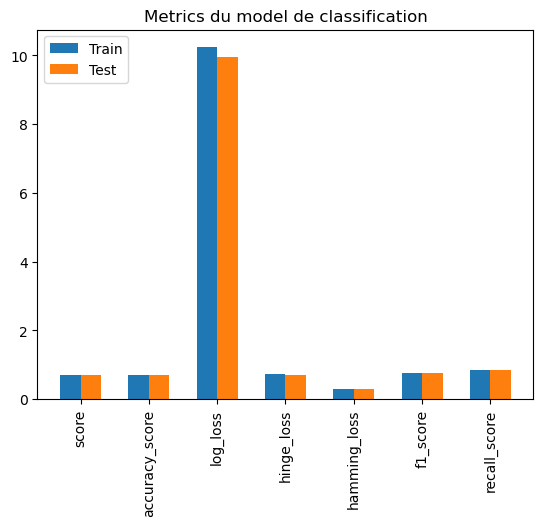

In [198]:
largeur_barre = 0.3
position_entrain = [i for i in range(len(valeur_train))]
position_test = [i + largeur_barre for i in range(len(valeur_test))]


plt.xticks([r + largeur_barre / 2 for r in range(len(valeur_train))], label)


plt.xticks(rotation= 'vertical')
plt.bar(position_entrain,valeur_train   ,width=largeur_barre)
plt.bar(position_test,valeur_test ,width=largeur_barre)
plt.legend(['Train','Test'],loc=2)
plt.title("Metrics du model de classification");

In [199]:
cl_accuracy_test == cl_score_test

True

In [200]:
np.sum(dataset_pour_classification['score']) / len(dataset_pour_classification)

0.5671835463569714

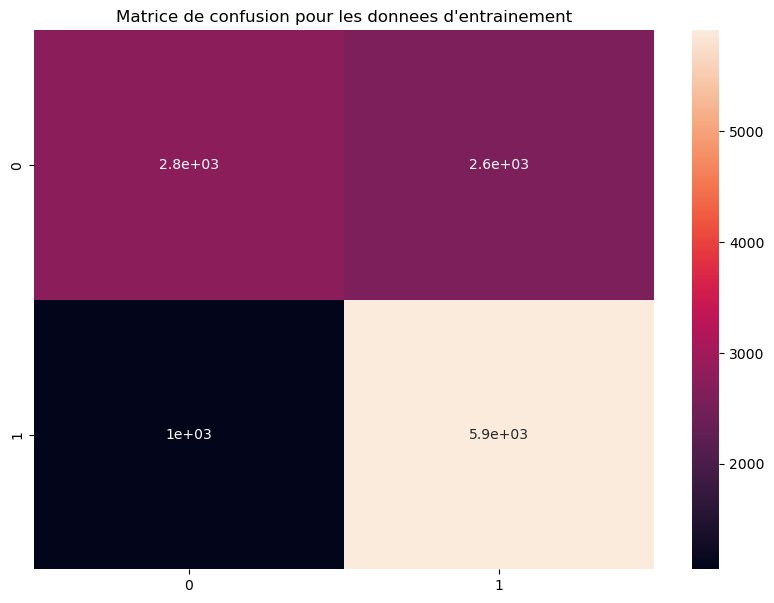

In [201]:
plt.figure(figsize = (10,7))
plt.title("Matrice de confusion pour les donnees d'entrainement")
sn.heatmap(cl_confusion_matrix, annot=True);

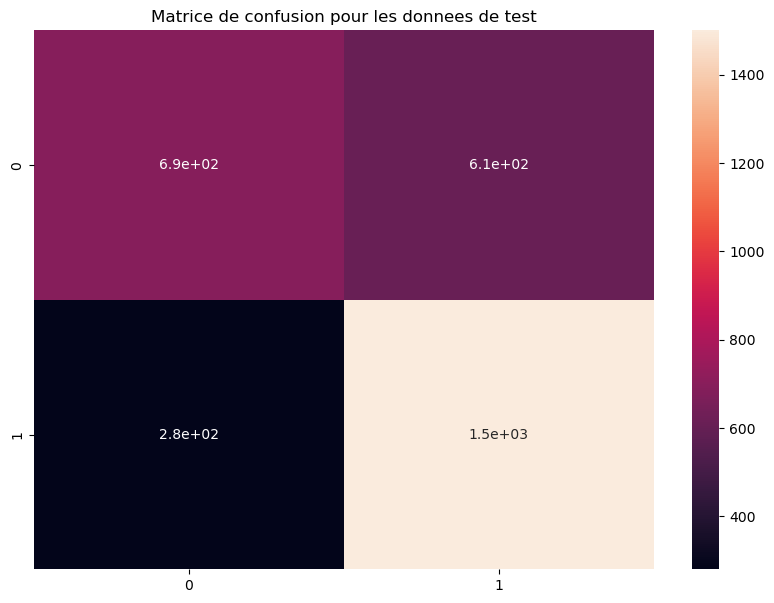

In [202]:
plt.figure(figsize = (10,7))
plt.title("Matrice de confusion pour les donnees de test")
sn.heatmap(cl_confusion_matrix_test, annot=True);

In [203]:

cl_classification_report = metrics.classification_report(y_train_cl,tmp_train_predict,target_names=['echec','Admin'])

print(cl_classification_report)

              precision    recall  f1-score   support

       echec       0.72      0.51      0.60      5369
       Admin       0.69      0.85      0.76      6961

    accuracy                           0.70     12330
   macro avg       0.71      0.68      0.68     12330
weighted avg       0.71      0.70      0.69     12330



In [204]:

cl_classification_report_test = metrics.classification_report(y_test_cl,tmp_test_predict,target_names=['echec','Admin'])

print(cl_classification_report_test)

              precision    recall  f1-score   support

       echec       0.71      0.53      0.61      1302
       Admin       0.71      0.84      0.77      1781

    accuracy                           0.71      3083
   macro avg       0.71      0.69      0.69      3083
weighted avg       0.71      0.71      0.70      3083



# Regression

*  

In [205]:
model_rg = SGDRegressor(loss='squared_error',random_state=10,learning_rate="constant")

Y_rg = dataset_pour_regression['score']
X_rg = dataset_pour_regression.drop('score',axis=1)

X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X_rg, Y_rg, random_state=2, train_size = .80)

10.0

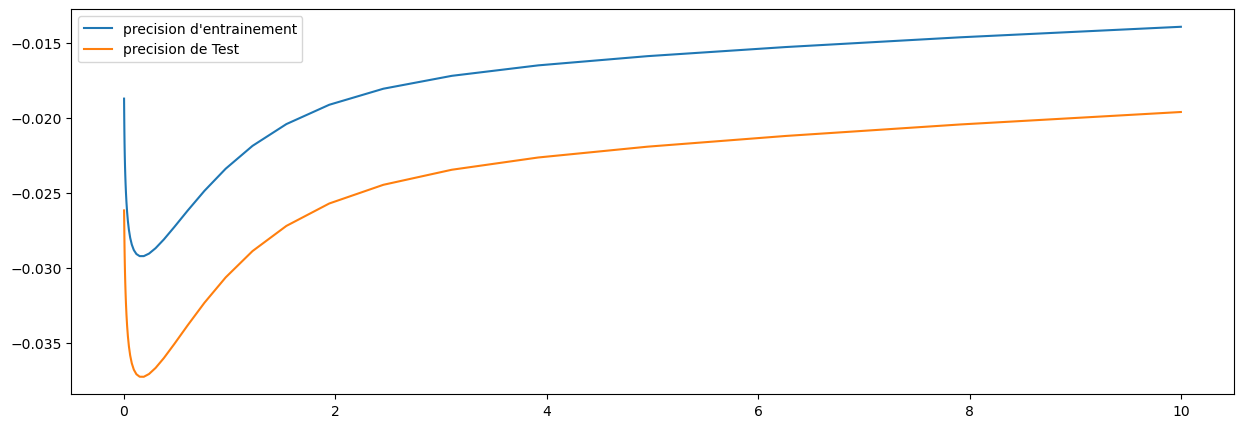

In [206]:
alpha_rg_PRECISION = getAlphaPourPrecision(X_train=X_train_rg, 
                                   X_test=X_test_rg, 
                                   y_train=y_train_rg, 
                                   y_test=y_test_rg,
                                   model_=model_rg,
                                   afficher_graph=True)
alpha_rg_PRECISION

10.0

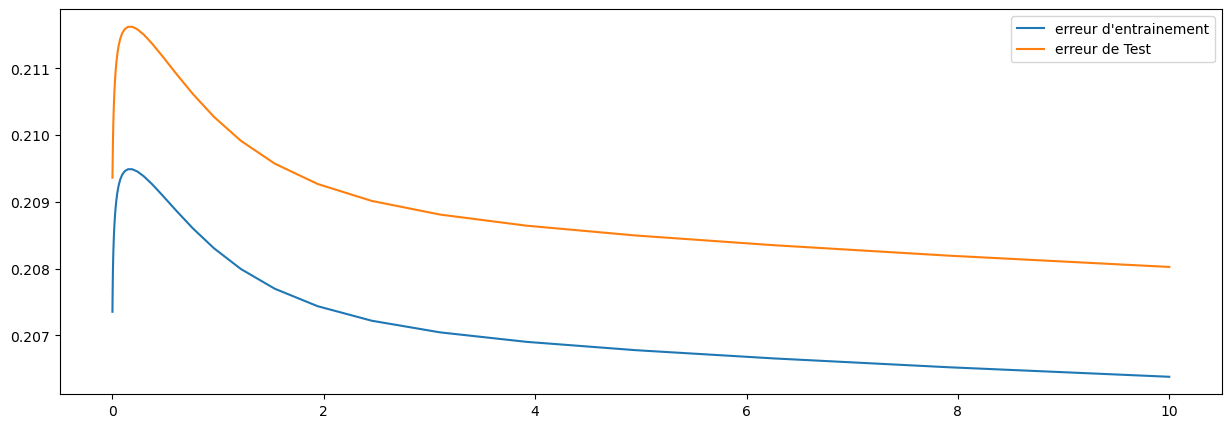

In [207]:
alpha_rg_ERREUR = getAplhaPourErreur(X_train=X_train_rg, 
                                   X_test=X_test_rg, 
                                   y_train=y_train_rg, 
                                   y_test=y_test_rg,
                                   model_=model_rg,
                                   afficher_graph=True,
                                    regression=True)
alpha_rg_ERREUR

In [208]:
alpha_rg_ERREUR == alpha_rg_PRECISION

True

### Les metrics

In [209]:
model_rg.set_params(alpha=alpha_rg_ERREUR)
model_rg.fit(X_train_rg,y_train_rg)


rg_score_train = model_rg.score(X_train_rg,y_train_rg)
rg_tmp_train_predict = model_rg.predict(X_train_rg)

rg_mean_squared_error_train = metrics.mean_squared_error(y_train_rg,rg_tmp_train_predict)

# metrics.confusion_matrix(y_train_rg,rg_tmp_train_predict)  #NON
# rg_accuracy = metrics.accuracy_score(y_train_rg,rg_tmp_train_predict)   #NON
# rg_log_loss = metrics.log_loss(y_train_rg,rg_tmp_train_predict)   #NON
# tmp_test_predict



#test
rg_score_test = model_rg.score(X_test_rg,y_test_rg)
rg_tmp_test_predict_test = model_rg.predict(X_test_rg)

rg_mean_squared_error_test = metrics.mean_squared_error(y_test_rg,rg_tmp_test_predict_test)

label_rg  =       ['score','mean_squared_error']
valeur_train_rg = [rg_score_train,rg_mean_squared_error_train]
valeur_test_rg = [rg_score_test,rg_mean_squared_error_test]
valeur_test_rg

[-0.019603044261333746, 0.20802528665372846]

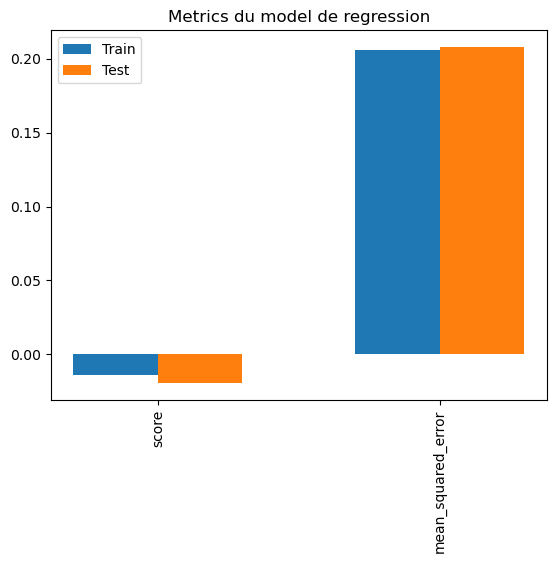

In [210]:
largeur_barre_rg = 0.3
position_train = [i for i in range(len(valeur_train_rg))]
position_test = [i + largeur_barre for i in range(len(valeur_test_rg))]


plt.xticks([r + largeur_barre_rg / 2 for r in range(len(valeur_train_rg))], label_rg)


plt.xticks(rotation= 'vertical')
plt.bar(position_train,valeur_train_rg   ,width=largeur_barre_rg)
plt.bar(position_test,valeur_test_rg ,width=largeur_barre_rg)
plt.legend(['Train','Test'],loc=2)
plt.title("Metrics du model de regression");

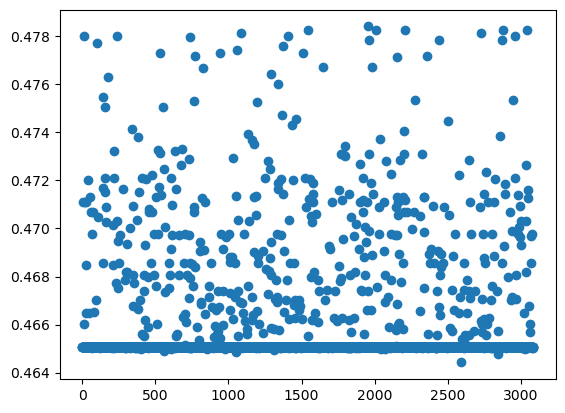

In [211]:
plt.scatter([i for i in range(len(rg_tmp_test_predict_test))],  rg_tmp_test_predict_test);

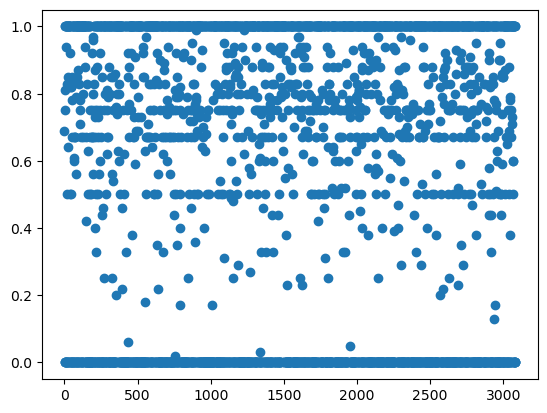

In [212]:
plt.scatter([i for i in range(len(y_test_rg))],  y_test_rg);